In [284]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer                 
from sklearn.feature_extraction.text import CountVectorizer         
from sklearn.feature_extraction.text import TfidfVectorizer          
from gensim.models import Word2Vec 

plt.style.use('ggplot')
import nltk


In [285]:
#reading the data
df=pd.read_csv(r"D:\DS Projects\github repo\amazonreviews\Reviews.csv")

In [286]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [287]:
df.shape

(568454, 10)

There is 568454 rows and 10 columns in the data

In [288]:
df['Score']

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64

In [289]:
df['Score'].value_counts().sort_index()

1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

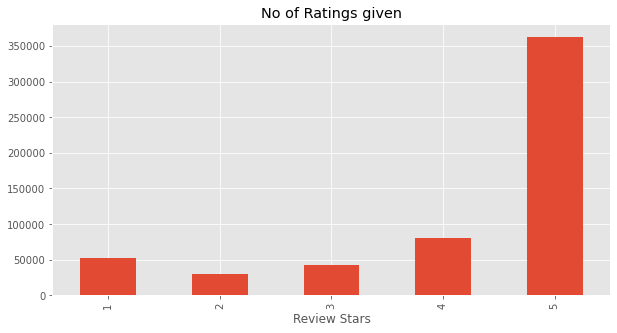

In [290]:
barplt=df['Score'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title='No of Ratings given')
barplt.set_xlabel('Review Stars')
plt.show()

In [291]:
new_df=df.head(10000)
df1=df.head(10000)

# understanding the data
From data it looks like our objective is to find the positive and the negative reviews.here we will consider 1 and 2 as negative reviews,4 and 5 as positive reviews. here we will consider 3 as a neutral response .


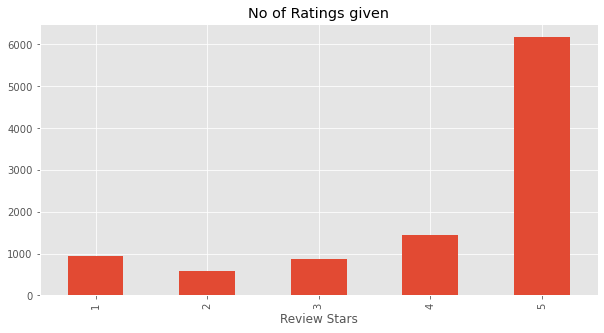

In [292]:
barplt=new_df['Score'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),title='No of Ratings given')
barplt.set_xlabel('Review Stars')
plt.show()

### Converting Score values to either positive or negative
If score is greater then 3 then positive and If score is less then 3 then negative 



In [293]:
new_data = new_df[new_df['Score']!=3] 

In [294]:
def ratings(x):
    if x > 3:
        return 'positive'
    else:
        return 'negative'
   
    

In [295]:
updated_score=new_data['Score']
ab=updated_score.map(ratings)


In [296]:
new_data['Score']=ab

C:\Users\rohit\AppData\Local\Temp\ipykernel_8340\2281614590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Score']=ab


In [297]:
new_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [298]:
new_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Data Cleaning

Removing duplicate values

In [299]:
final_data=new_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'})

In [300]:
final=final_data[final_data['HelpfulnessNumerator']>=final_data['HelpfulnessDenominator']]

In [301]:
final_x=final['Text']
final_y=final['Score']

Doing Stemming and Removing the stopwords

In [302]:
#importing regular expression
import re
temp=[]
sno=nltk.stem.SnowballStemmer('english')
for sentence in final_x:
    sentence=sentence.lower()
    cln=re.compile('<.*?>')
    sentence=re.sub(cln,' ',sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r'',sentence)

    words=[sno.stem(word) for word in sentence.split() if word not in stopwords.words('english')]
    temp.append(words)


In [303]:
final_x=temp

In [304]:
print(final_x[1])

['product', 'arriv', 'label', 'jumbo', 'salt', 'peanutsth', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'product', 'jumbo']


In [313]:
sntnc=[]
for row in final_x:
    seqnce=''
    for words in row:
        seqnce=seqnce + ' '+ words
    sntnc.append(seqnce)

final_x=sntnc
print(final_x[1])


 product arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres product jumbo


Encoding using Bag Of Words

In [317]:
count_vector=CountVectorizer(max_features=5000)
bow_data=count_vector.fit_transform(final_x)

In [319]:
print(bow_data[1])

  (0, 688)	2
  (0, 60)	1
  (0, 481)	1
  (0, 741)	1
  (0, 635)	1
  (0, 16)	1
  (0, 798)	1
  (0, 794)	1
  (0, 863)	1
  (0, 943)	1


Their is a drawback of BOW. if we remove the stowords then two opposite sentence can become same. for eg. 1). this is good food 2.) this is not good food.
If we remove stopwords from both of these sentences  then these two opposite sentences will become same.
So we will us n-grams to overcome  this problem

In [320]:
fng=final_x


In [321]:
cnt_vec_fng=CountVectorizer(ngram_range=(1,2))
bigram_data=cnt_vec_fng.fit_transform(fng)

In [323]:
print(bigram_data[1])

  (0, 117664)	2
  (0, 9991)	1
  (0, 83005)	1
  (0, 80893)	2
  (0, 128278)	1
  (0, 110491)	1
  (0, 110422)	1
  (0, 3355)	1
  (0, 136027)	1
  (0, 135260)	1
  (0, 159281)	1
  (0, 145645)	1
  (0, 50145)	1
  (0, 161853)	1
  (0, 78566)	1
  (0, 124941)	1
  (0, 117706)	1
  (0, 10052)	1
  (0, 83049)	1
  (0, 80897)	1
  (0, 128372)	1
  (0, 110492)	1
  (0, 110423)	1
  (0, 3511)	1
  (0, 136201)	1
  (0, 135463)	1
  (0, 159289)	1
  (0, 145710)	1
  (0, 50158)	1
  (0, 161869)	1
  (0, 78575)	1
  (0, 124947)	1
  (0, 118016)	1


Using TFIDF

In [324]:
tf_data=final_x

In [325]:
con_tf_data=TfidfVectorizer(max_features=5000)
tfidf_data=con_tf_data.fit_transform(tf_data)



In [326]:
print(tfidf_data[1])

  (0, 3651)	0.2912201536394621
  (0, 2348)	0.26937328016272527
  (0, 4736)	0.23272866054671854
  (0, 1553)	0.27725745398773943
  (0, 4308)	0.1534336742723082
  (0, 4677)	0.28360058378429637
  (0, 3980)	0.1555053070573826
  (0, 4012)	0.15468618866062414
  (0, 172)	0.15757141275820846
  (0, 3228)	0.19548606769029186
  (0, 3780)	0.16718539159587714
  (0, 2432)	0.60152538432505
  (0, 2510)	0.20173684920619545
  (0, 340)	0.16799849581411475
  (0, 3445)	0.19433240840000932


The above  the output shows the indices of non-zero elements along with their corresponding TF-IDF weights. The non-zero elements indicate which terms from the vocabulary are present in the second document, and the weights represent the importance of each term in the document based on TF-IDF calculations.

Using Word2Vec 

In [328]:
word_vec=final_x

In [329]:
splitted = []
for row in word_vec: 
    splitted.append([word for word in row.split()])

In [370]:
train_w2v = Word2Vec(splitted, min_count=5, vector_size=50, workers=4)

avg_data = []
for row in splitted:
    vect = np.zeros(50)
    count = 0
    for word in row:
        if word in train_w2v.wv.key_to_index:
            vect += train_w2v.wv[word]
            count += 1
    if count > 0:
        avg_vector = vect / count
    else:
        avg_vector = np.zeros(50)  # Assign zero vector if count is zero
    avg_data.append(avg_vector)




In [369]:
print(avg_data[1])

[ 0.09697075 -0.18109607  0.02812658  0.0243539   0.00604699 -0.25966957
  0.28417426  0.61645773 -0.409366   -0.27180291  0.10537493 -0.6492649
 -0.00126061  0.27768121 -0.36846549  0.12984861  0.13473556  0.00139367
 -0.25255559 -0.14217945  0.15541819  0.37678142  0.3969949  -0.2254714
  0.17373109  0.18918318 -0.33062005  0.0369227  -0.31999273  0.0284307
  0.2072841  -0.27225586 -0.06346891  0.08328401 -0.17734036  0.29068873
  0.23492643  0.07854205 -0.16777067 -0.43928423  0.38668119 -0.25459032
  0.00901972  0.04791618  0.75377169  0.02277354 -0.34993927 -0.61410544
  0.05685563  0.15810737]


In [305]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# VADER Seniment Scoring

In [306]:
sia = SentimentIntensityAnalyzer()

below code  process the DataFrame df containing text data. It uses the iterrows() method to iterate over each row in the DataFrame, retrieves the 'Text' and 'Id' values from each row, and computes sentiment scores using the sia.polarity_scores() function from the sia object.
The tqdm() function is used to provide a progress bar during the iteration. i represents the index of the row, and row is a Series object that contains the data of the current row.

In [307]:
dit = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    text = row['Text']
    myid = row['Id']
    dit[myid] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [308]:
vad=pd.DataFrame(dit).T
vad=vad.reset_index().rename(columns={'index':'Id'})
vad=vad.merge(final_data,how='left')

In [309]:
vad.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,positive,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,negative,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,positive,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,negative,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,positive,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


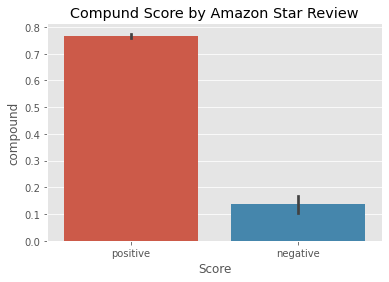

In [310]:
ax = sns.barplot(data=vad, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

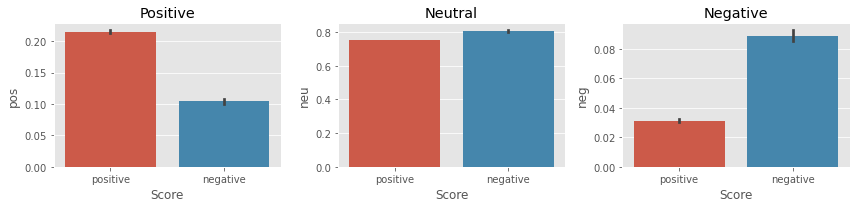

In [311]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vad, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vad, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vad, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [379]:
sia.polarity_scores("i am  satisfied with this product")

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

In [380]:
sia.polarity_scores("i am not satisfied with this product")

{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.3252}